In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re
import scipy.stats as stats

import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [2]:
#NASA Exoplanet Archieve of WASP-17b
# https://exoplanetarchive.ipac.caltech.edu/overview/HAT-P-26b

In [3]:
df = pd.read_csv("HAT_P_26_literature.csv")#, header=None)
df = df.set_index('Parameter')


In [4]:
df

,TICv8,Gaia DR2,Stassun et al. 2017,Knutson et al. 2014,Mortier et al. 2013,Hartman et al. 2010,ExoFOP-TESS TOI
Parameter,,,,,,,
T_eff,5061.9000+137.5580-87.0407,5046.6504+66.9196-85.6504,5079+/-88,---,5011+/-55,5079+/-88,5061.900+/-112.299
metallicity,---,---,-0.04,0.10+/-0.08,0.01+/-0.04,-0.04+/-0.08,---
stellar_density,1.8766198+0.5531721-0.3180258,---,2.37+/-0.65,---,1.69+/-0.32,---,---
log_g,4.4966700+0.0863137-0.0748195,---,4.56+/-0.06,---,4.31+/-0.17,4.56+/-0.06,4.4966700+/-0.0805666
stellar_radius,0.8597780+0.0403678-0.0565970,0.8564404+0.0298277-0.0222692,0.87+/-0.05,---,1.07+/-0.27,0.788 +0.098-0.043,0.859777987003326+/-0.048482400000000
colour,#1f77b4,#ff7f0e,#2ca02c,#d62728,#9467bd,#8c564b,#e377c2


In [5]:
df_ref_list = df.columns

df_T_eff_list = df.loc['T_eff'] #Stellar effective temperature (K)
df_metallicity_list = df.loc['metallicity'] #Metallicity ([Fe/H])
df_log_g_list = df.loc['log_g'] #Stellar surface gravity (log10(cm/s^2)
df_rs_list = df.loc['stellar_radius']

T_eff_list, T_eff_ref_list = read_df_params(df_T_eff_list, df_ref_list)
metallicity_list, metallicity_ref_list = read_df_params(df_metallicity_list, df_ref_list)
log_g_list, log_g_ref_list = read_df_params(df_log_g_list, df_ref_list)
rs_list, rs_ref_list = read_df_params(df_rs_list, df_ref_list)

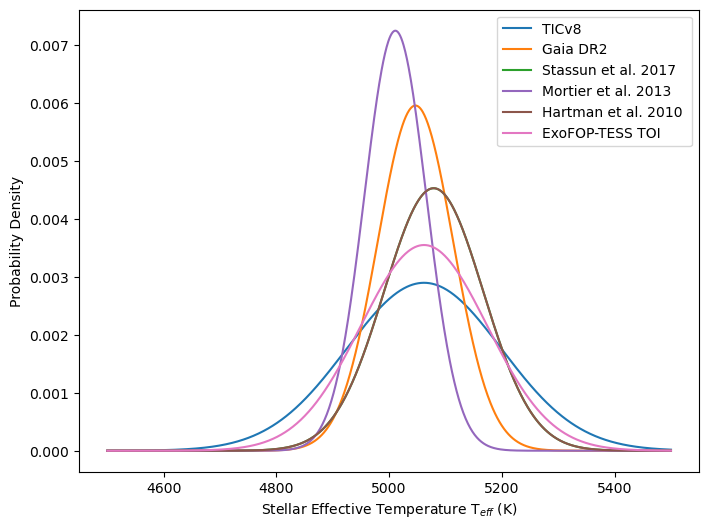

In [6]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(4500, 5500, 1000)
for obj, author in zip(T_eff_list, T_eff_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar Effective Temperature T$_{eff}$ (K)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

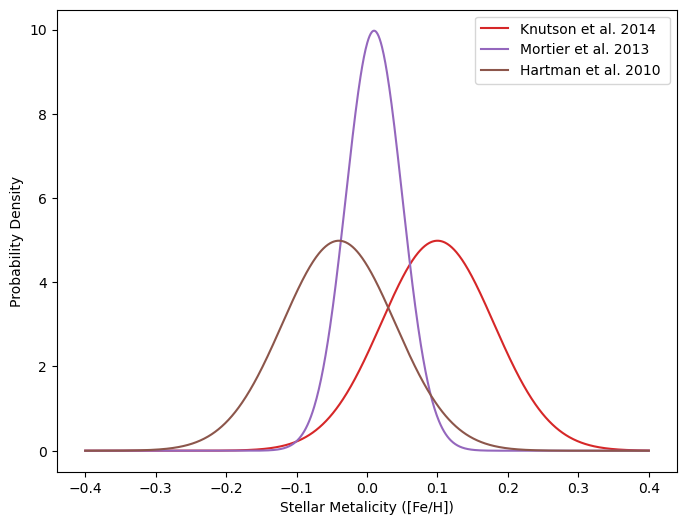

In [7]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(-0.4, 0.4, 1000)
for obj, author in zip(metallicity_list, metallicity_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar Metalicity ([Fe/H])")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

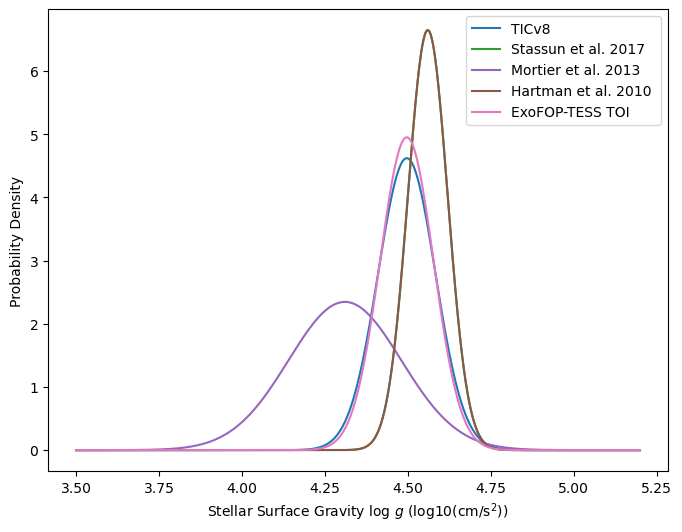

In [8]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(3.5, 5.2, 1000)
for obj, author in zip(log_g_list, log_g_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar Surface Gravity log $g$ (log10(cm/s$^2$))")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

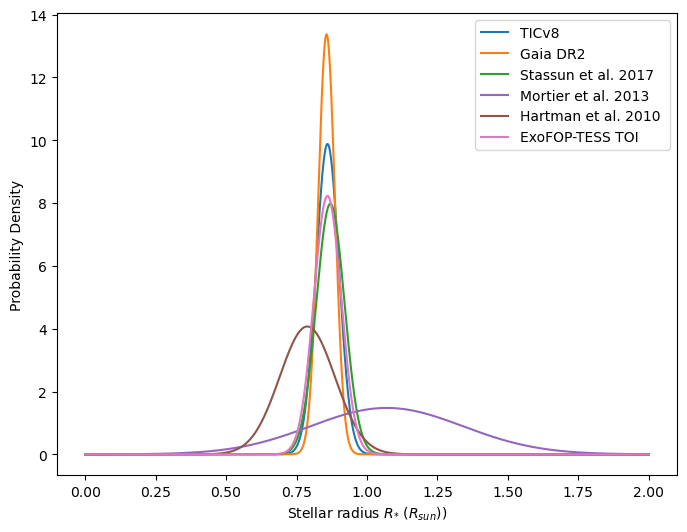

In [9]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0, 2, 1000)
for obj, author in zip(rs_list, rs_ref_list):
    mu, upper, lower = obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Stellar radius $R_{*}$ ($R_{sun}$))")
plt.ylabel("Probability Density")
ax.legend()
plt.show()